In [ ]:
%pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**CORRELATION**


**CORRELATION**

A correlation is a statistical indicator of the relationship among two different variables. In a scatterplot, the fit of the data can be shown graphically. We can typically evaluate the relationship between the variables and decide whether or not they are related using scatterplot. In addition, the correlation is measured in integer from -1 to +1 which shows if there is positive correlation or negative correlation.

In [ ]:
#pandas and NumPy imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf
from pandas_datareader import data

# For time stamps
from datetime import datetime
import datetime

# For division in Python 3
from __future__ import division
###################################
#!/usr/bin/python
import warnings
import pandas_datareader.data as pdr
warnings.simplefilter('ignore', FutureWarning)
#############################################
from functools import reduce
from tqdm import tqdm

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker  df=data.DataReader('AAPL','yahoo','2016/1/1','2017/1/1')
    globals()[stock] = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [42]:
# Summary Stats for Apple stocks
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,151.599841,153.741151,149.594405,151.757678,151.399190,8.547005e+07
std,12.894964,12.776537,12.901049,12.872615,12.689007,2.306756e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.519590e+07
25%,142.120003,143.987495,139.974998,142.472496,142.198219,6.982400e+07
50%,149.580002,151.655006,147.825005,150.524994,150.180428,8.038435e+07
75%,161.912498,164.645004,159.660004,162.897503,162.163879,9.390958e+07
max,178.550003,179.610001,176.699997,178.960007,178.154037,1.826020e+08


In [41]:
# General Info about Apple Stock
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-07 00:00:00-05:00 to 2023-02-07 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 21.9 KB


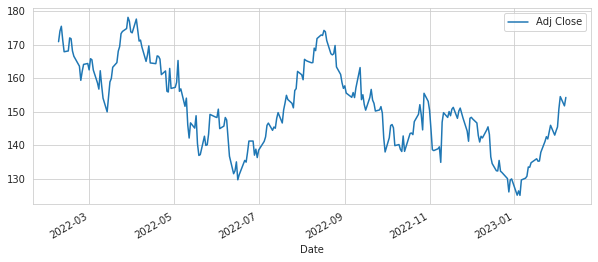

In [ ]:
# Historical view of the closing price of Apple stock
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

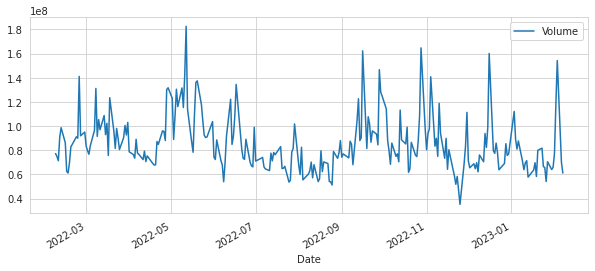

In [ ]:
# Historical view of the total volume of Apple stock traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [ ]:
# Calculation to grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [ ]:
# Quick look of the data frame
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-02-07 00:00:00-05:00,170.886917,157.935501,138.938004,298.156250
2022-02-08 00:00:00-05:00,174.042633,161.413498,139.212997,301.732697
2022-02-09 00:00:00-05:00,175.486099,161.189499,141.453003,308.320984
2022-02-10 00:00:00-05:00,171.344833,159.003494,138.602493,299.572968
2022-02-11 00:00:00-05:00,167.880508,153.293503,134.130005,292.301117


In [ ]:
# Calculate the daily return percent of all stocks and store them in a new tech returns DataFrame
tech_rets = closing_df.pct_change()

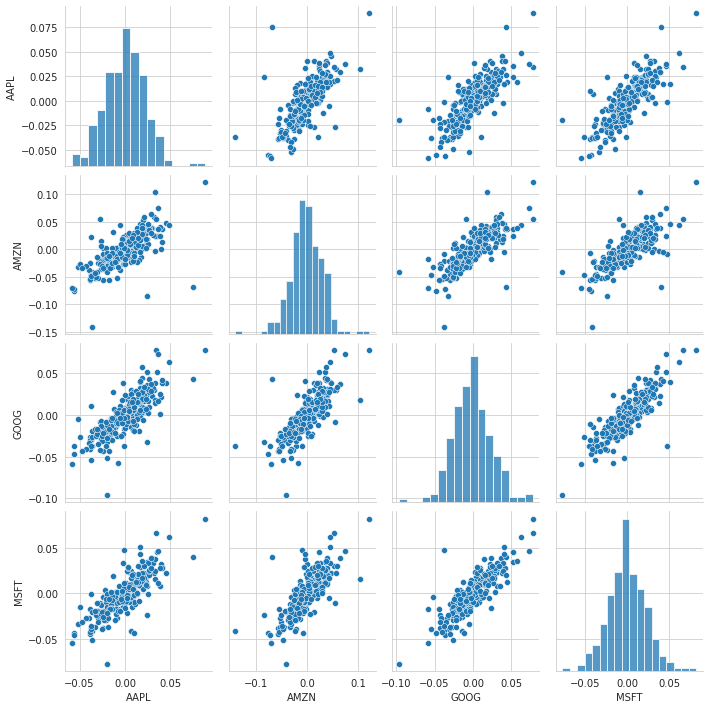

In [ ]:
# Correlation analysis for every possible combination of stocks in our technology stock ticker list.
sns.pairplot(tech_rets.dropna())

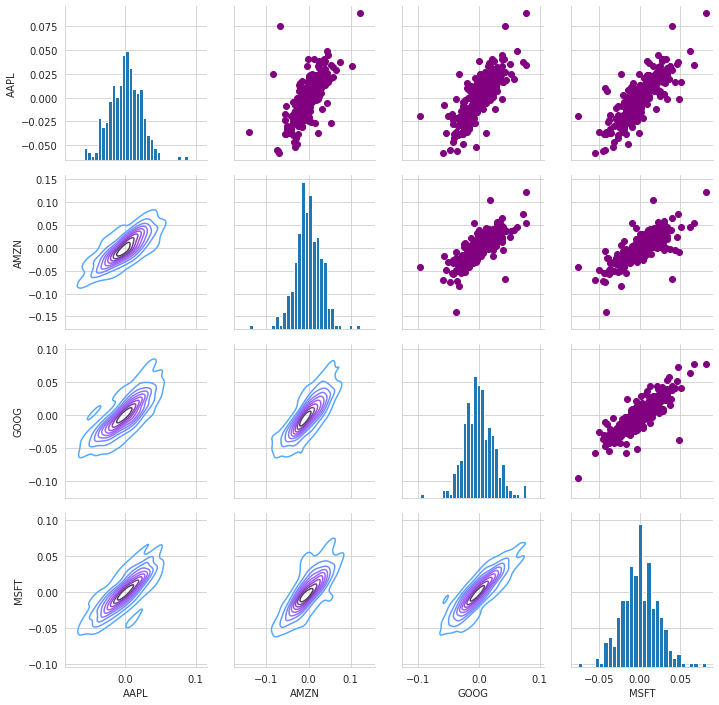

In [ ]:
# Mixed plot to visualize the correlation between all technology stocks
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

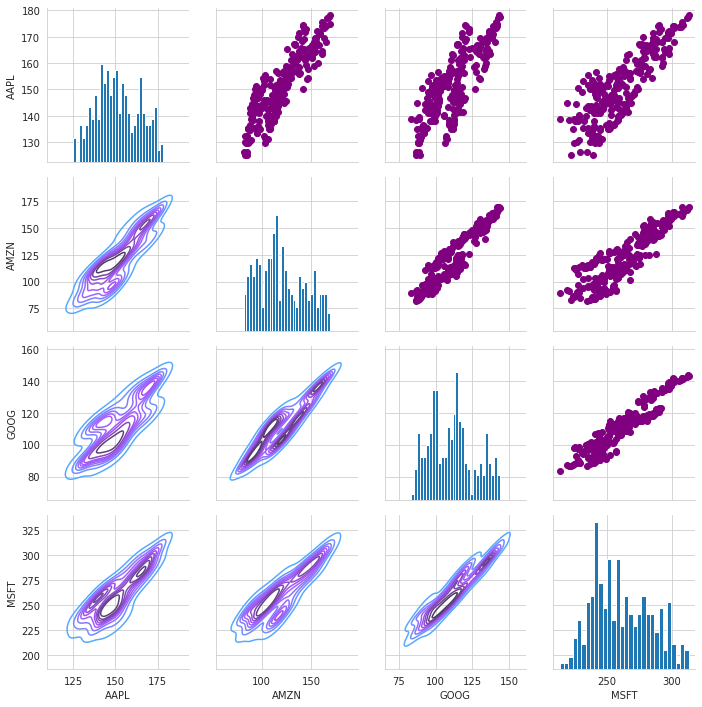

In [ ]:
# Correlation analysis by using mixed types of plots for the closing price of all technology stocks
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

**CORRELATION IN FINANCE CONCEPT**

Correlation plays a big role in sector of finance because helps in predicting future trends and also to manage risks in the portfolio. Additionally, correlation and other statistical models like variance and others are used in creating and setting price of derivatives.
Currently in sector of finance, the idea of correlation is used many times to prove whether a shares of the company will decrease or increase to modify interest rates or commodity prices. Similar to this, a portfolio manager may try to lower risk by making sure that any item in the portfolio is not too connected with others whereby he or she can take decision of diversifying.


**HOW COEFFICIENT CORRELATION IS MEASURED**
 
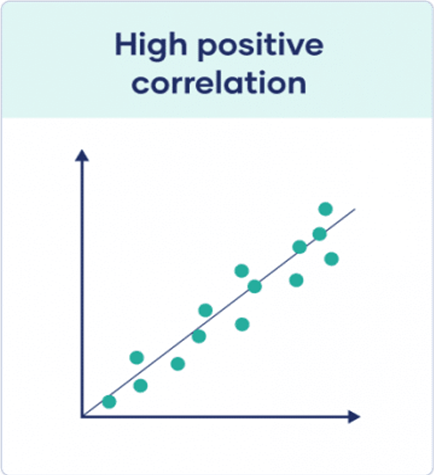

**NOTE**: +1, When the correlation tends to be +1 shows that there is strong positive relationship among the two variables (variables tend to move in same direction).

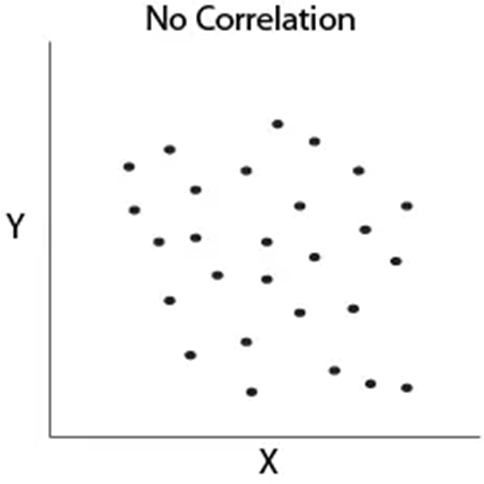

NOTE: 0, When the correlation tends to be 0 shows that there is no relationship among the two variables. 

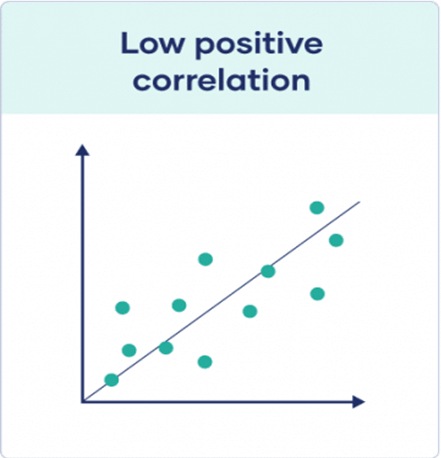

NOTE: -1, When the correlation tends to be -1 shows that there is negative relationship the two variables (variables tends to move in different directions).

**COEFFICIENT CORRELATION FORMULA**

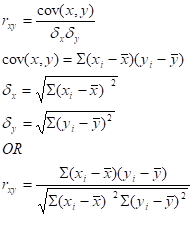

In [ ]:
np.random.seed(123)

In [ ]:
def process_date(df):
    df = df.reset_index().rename(columns={'Date': 'date'})
    df.date = df.date.dt.date

    return df

In [ ]:
representation_symbol_mapping = {
    'bond': '^TNX',
    'stock': 'AAPL',
    'crypto': 'BTC-USD',
    'crypto_etf': 'BTF',
    'equity_etf': 'SPY',
}

In [ ]:
START = '2022-01-01'
END = '2022-12-31'

In [ ]:
def get_representative_data():
    dfs = []

    for asset_kind_str, symbol in representation_symbol_mapping.items():
        df = yf.download(symbol, start=START, end=END)

        if 'Adj Close' in df:
            df = df.rename(columns={'Adj Close': asset_kind_str})[[asset_kind_str]]
        else:
            df = df.rename(columns={'Close': asset_kind_str})[[asset_kind_str]]
        
        df = process_date(df)
        dfs.append(df)
    
    df = reduce(lambda left, right: pd.merge(left, right, on=['date'], how='inner'), dfs)

    return df

In [ ]:
df = get_representative_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
def cal_return(df):
    fields = [col for col in df.columns if col != 'date']
    for field in fields:
        df[field] = df[field] / df[field].shift(1) - 1
    
    df['bond'] *= -1
    df = df.dropna(subset=[col for col in df.columns if col != 'date'])

    return df

In [ ]:
df = cal_return(df)

In [ ]:
def get_statistics(df):
    fields = [col for col in df.columns if col != 'date']
    df_stats = df.agg(
        {
            field: ['mean', 'std', 'var', 'skew', 'kurt'] for field in fields
        }
        
    )

    return df_stats

In [ ]:
df_stats = get_statistics(df)

In [ ]:
df_stats

,bond,stock,crypto,crypto_etf,equity_etf
mean,-0.003858,-0.001074,-0.003278,-0.003096,-0.000709
std,0.027622,0.022471,0.040119,0.041634,0.015297
var,0.000763,0.000505,0.001610,0.001733,0.000234
skew,-0.041607,0.326067,-0.897183,-0.432430,0.049227
kurt,0.451780,1.079767,5.357589,3.260793,0.353268


In [ ]:
cov = df.cov()
cov

,bond,stock,crypto,crypto_etf,equity_etf
bond,0.000763,0.000051,0.000064,0.000041,0.000049
stock,0.000051,0.000505,0.000447,0.000487,0.000304
crypto,0.000064,0.000447,0.001610,0.001506,0.000346
crypto_etf,0.000041,0.000487,0.001506,0.001733,0.000375
equity_etf,0.000049,0.000304,0.000346,0.000375,0.000234


In [ ]:
corr = df.corr()
corr

,bond,stock,crypto,crypto_etf,equity_etf
bond,1.000000,0.082969,0.058033,0.035643,0.116677
stock,0.082969,1.000000,0.496039,0.520173,0.885435
crypto,0.058033,0.496039,1.000000,0.901861,0.563882
crypto_etf,0.035643,0.520173,0.901861,1.000000,0.588086
equity_etf,0.116677,0.885435,0.563882,0.588086,1.000000


**VOLATILITY**

**Volatility**

Volatility is always measured by variance or standard deviation. This means that, as higher the value of standard deviation or variance the more volatile are the returns or prices. According to the bellow formula shows that as correlation increase it will also increase variance which will lead to the high volatile of stock’s price and return. 

In general, easy to understand sense, the downward or upward movement of a security over a time period can be called as volatility . Out of many factors, volatility also defines the risk of security. We can say, more the volatility,  implies riskier the security. If the price of a security changes minutely over a wider span of time, it can be said to be as less volatile.

Conversely, over a short period of time, if the security’s price changes rapidly, it can be said to be more volatile. Volatility is generally measured by calculating the standard deviation of the annualised returns over a time period.

For a given security, dispersion of returns is measured using volatility. In options trading, volatility plays an important role.


[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
Date                                                                  
2022-05-11 00:00:00+05:30  16270.049805  16318.750000  15992.599609   
2022-05-12 00:00:00+05:30  16021.099609  16041.950195  15735.750000   
2022-05-13 00:00:00+05:30  15977.000000  16083.599609  15740.849609   
2022-05-16 00:00:00+05:30  15845.099609  15977.950195  15739.650391   
2022-05-17 00:00:00+05:30  15912.599609  16284.250000  15900.799805   
2022-05-18 00:00:00+05:30  16318.150391  16399.800781  16211.200195   
2022-05-19 00:00:00+05:30  15917.400391  15984.750000  15775.200195   
2022-05-20 00:00:00+05:30  16043.799805  16283.049805  16003.849609   
2022-05-23 00:00:00+05:30  16290.950195  16414.699219  16185.750000   
2022-05-24 00:00:00+05:30  16225.549805  16262.799805  16078.599609   
2022-05-25 00:00:00+05:30  16196.349609  16223.349609  16006.950195   
2022-05-

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb66bfe9520>,
      dtype=object)

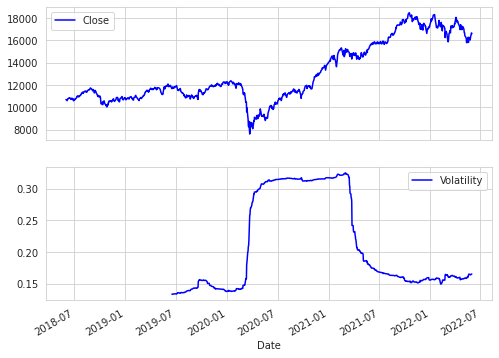

In [43]:
## Computing Volatility
# Load the required modules and packages
import numpy as np
import pandas as pd
import yfinance as yf

# Pull NIFTY data from Yahoo finance
NIFTY = yf.download('^NSEI',start='2018-6-1', end='2022-6-1')

# Compute the logarithmic returns using the Closing price
NIFTY['Log_Ret'] = np.log(NIFTY['Close'] / NIFTY['Close'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
NIFTY['Volatility'] = NIFTY['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
print(NIFTY.tail(15))

# Plot the NIFTY Price series and the Volatility
NIFTY[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

In [45]:
# Sharpe Ratio function
def sharpe(returns, daily_risk_free_rate, days=252):
  volatility = returns.std()
  sharpe_ratio = (returns.mean() - daily_risk_free_rate) / volatility * np.sqrt(days)
  return sharpe_ratio

In [47]:
# Sortino Ratio function

def sortino(returns, daily_risk_free_rate, days=252):
  volatility = returns.std()
  sortino_ratio = (expected_returns - daily_risk_free_rate) / volatility * np.sqrt(days)
  return sortino_ratio

In [91]:
sharpe(NIFTY['Log_Ret'], 0)

0.5361089512567283

In [54]:
# fetch multiple asset data
def getMultiAssetData(ticketList, date_from, date_to):
    def getData(ticker):
        data = yf.download(ticker, date_from, date_to)
        return data
    datas = map(getData, tickerList)
    return pd.concat(datas, keys=tickerList, names=['Ticker', 'Date'])

In [77]:
date_from = datetime.date(2018, 1, 1)
date_to = datetime.date(2020, 8, 31)
tickerList = ['AAPL', 'AMZN', 'JWN', 'PG']
multiData = getMultiAssetData(tickerList, date_from, date_to)
df = multiData.copy()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [78]:
df = df.loc['AAPL', :]
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-24 00:00:00-04:00,128.697495,128.785004,123.937500,125.857498,124.150398,345937600
2020-08-25 00:00:00-04:00,124.697502,125.180000,123.052498,124.824997,123.131897,211495600
2020-08-26 00:00:00-04:00,126.180000,126.992500,125.082497,126.522499,124.806374,163022400
2020-08-27 00:00:00-04:00,127.142502,127.485001,123.832497,125.010002,123.314392,155552400
2020-08-28 00:00:00-04:00,126.012497,126.442497,124.577499,124.807503,123.114639,187630000


In [80]:
# compute volatility using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns = np.log(df['Close']/df['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.tail()

Date
2020-08-24 00:00:00-04:00    0.417332
2020-08-25 00:00:00-04:00    0.417219
2020-08-26 00:00:00-04:00    0.417071
2020-08-27 00:00:00-04:00    0.417351
2020-08-28 00:00:00-04:00    0.417170
Name: Close, dtype: float64

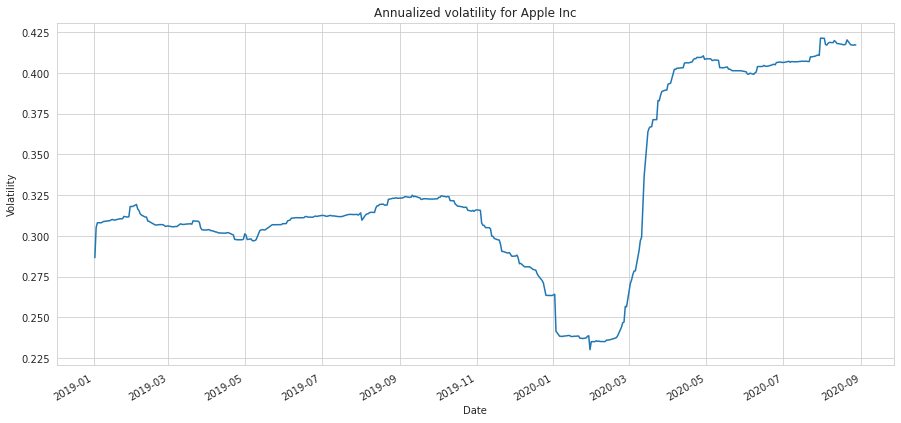

In [81]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for Apple Inc')
plt.show()

In [82]:
# use pivot to reshape DataFrame with only Close
df = multiData.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePriceTable = closePrice.pivot(index='Date', columns='Ticker', values='Close')
closePriceTable.tail()

Ticker,AAPL,AMZN,JWN,PG
Date,,,,
2020-08-24 00:00:00-04:00,125.857498,165.373001,15.57,138.509995
2020-08-25 00:00:00-04:00,124.824997,167.324493,15.54,139.059998
2020-08-26 00:00:00-04:00,126.522499,172.092499,14.69,138.389999
2020-08-27 00:00:00-04:00,125.010002,170.000000,14.79,138.210007
2020-08-28 00:00:00-04:00,124.807503,170.089996,15.68,138.770004


In [83]:
# compute volatility using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns_portfolio = np.log(closePriceTable/closePriceTable.shift(1))
returns_portfolio.fillna(0, inplace=True)
volatility_portfolio = returns_portfolio.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility_portfolio.tail()

Ticker,AAPL,AMZN,JWN,PG
Date,,,,
2020-08-24 00:00:00-04:00,0.417332,0.334757,0.847830,0.325688
2020-08-25 00:00:00-04:00,0.417219,0.334777,0.847742,0.325297
2020-08-26 00:00:00-04:00,0.417071,0.335686,0.848871,0.325198
2020-08-27 00:00:00-04:00,0.417351,0.336014,0.848346,0.325138
2020-08-28 00:00:00-04:00,0.417170,0.335874,0.850365,0.325148


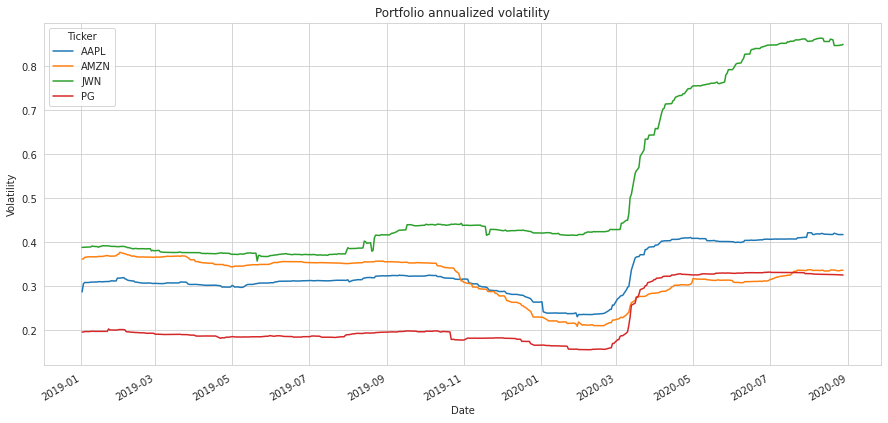

In [84]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax2 = fig.add_subplot(1, 1, 1)
volatility_portfolio.plot(ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility')
ax2.set_title('Portfolio annualized volatility')
plt.show()

In [85]:
df = multiData.copy()
df = df.loc['AAPL', :]
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-24 00:00:00-04:00,128.697495,128.785004,123.937500,125.857498,124.150398,345937600
2020-08-25 00:00:00-04:00,124.697502,125.180000,123.052498,124.824997,123.131897,211495600
2020-08-26 00:00:00-04:00,126.180000,126.992500,125.082497,126.522499,124.806374,163022400
2020-08-27 00:00:00-04:00,127.142502,127.485001,123.832497,125.010002,123.314392,155552400
2020-08-28 00:00:00-04:00,126.012497,126.442497,124.577499,124.807503,123.114639,187630000


In [86]:
# compute sharpe ratio using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns = np.log(df['Close']/df['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
sharpe_ratio = returns.mean()/volatility
sharpe_ratio.tail()

Date
2020-08-24 00:00:00-04:00    0.003805
2020-08-25 00:00:00-04:00    0.003807
2020-08-26 00:00:00-04:00    0.003808
2020-08-27 00:00:00-04:00    0.003805
2020-08-28 00:00:00-04:00    0.003807
Name: Close, dtype: float64

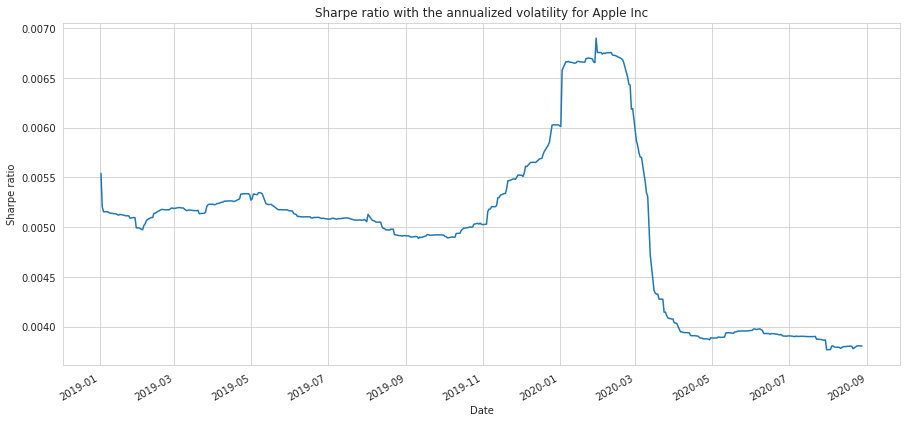

In [87]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax3 = fig.add_subplot(1, 1, 1)
sharpe_ratio.plot(ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Sharpe ratio')
ax3.set_title('Sharpe ratio with the annualized volatility for Apple Inc')
plt.show()

In [88]:
# use pivot to reshape DataFrame with only Close
df = multiData.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePriceTable = closePrice.pivot(index='Date', columns='Ticker', values='Close')
closePriceTable.tail()

Ticker,AAPL,AMZN,JWN,PG
Date,,,,
2020-08-24 00:00:00-04:00,125.857498,165.373001,15.57,138.509995
2020-08-25 00:00:00-04:00,124.824997,167.324493,15.54,139.059998
2020-08-26 00:00:00-04:00,126.522499,172.092499,14.69,138.389999
2020-08-27 00:00:00-04:00,125.010002,170.000000,14.79,138.210007
2020-08-28 00:00:00-04:00,124.807503,170.089996,15.68,138.770004


In [89]:
# compute sharpe ratio using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns_portfolio = np.log(closePriceTable/closePriceTable.shift(1))
returns_portfolio.fillna(0, inplace=True)
volatility_portfolio = returns_portfolio.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
sharpe_ratio_portfolio = returns_portfolio.mean()/volatility_portfolio
sharpe_ratio_portfolio.tail()

Ticker,AAPL,AMZN,JWN,PG
Date,,,,
2020-08-24 00:00:00-04:00,0.003805,0.004687,-0.002010,0.001951
2020-08-25 00:00:00-04:00,0.003807,0.004686,-0.002010,0.001954
2020-08-26 00:00:00-04:00,0.003808,0.004674,-0.002008,0.001954
2020-08-27 00:00:00-04:00,0.003805,0.004669,-0.002009,0.001955
2020-08-28 00:00:00-04:00,0.003807,0.004671,-0.002004,0.001955


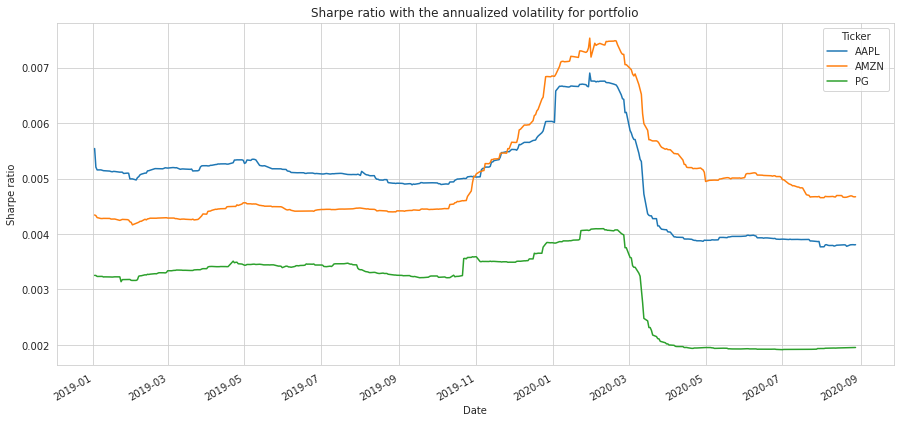

In [90]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax4 = fig.add_subplot(1, 1, 1)
sharpe_ratio_portfolio[sharpe_ratio_portfolio.columns[sharpe_ratio_portfolio.columns != 'JWN']].plot(ax=ax4)
ax4.set_xlabel('Date')
ax4.set_ylabel('Sharpe ratio')
ax4.set_title('Sharpe ratio with the annualized volatility for portfolio')
plt.show()